In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io.wavfile import read
from IPython.display import Audio, display

In [6]:
rate, audio_data = read("/content/kitten-calling-for-mother-cute-meowing-sound-332671.wav")

# Mengambil durasi dan membuat sumbu waktu
N = len(audio_data)
DURATION = N / rate
t = np.linspace(0.0, DURATION, N, endpoint=False)

# Jika audio stereo, diubah jadi mono dengan memilih salah satu.
if audio_data.ndim > 1:
    audio_data = audio_data[:, 0]

print(f"File audio berhasil dibaca. Durasi: {DURATION:.2f} detik, Rate: {rate} Hz.")

File audio berhasil dibaca. Durasi: 8.11 detik, Rate: 48000 Hz.


In [7]:
# Menghitung Spektrum Frekuensi (FFT)
yf = fft(audio_data)
xf = fftfreq(N, 1 / rate)


# Identifikasi Frekuensi Dominan
yf_abs = np.abs(yf[:N//2])
xf_positive = xf[:N//2]


threshold = 0.1 * np.max(yf_abs)
yf_filtered = yf.copy()
yf_filtered[np.abs(yf) < threshold] = 0

In [8]:
# Rekonstruksi Sinyal Waktu (IFFT)
reconstructed_signal_raw = ifft(yf_filtered)
reconstructed_signal = np.int16(reconstructed_signal_raw.real)

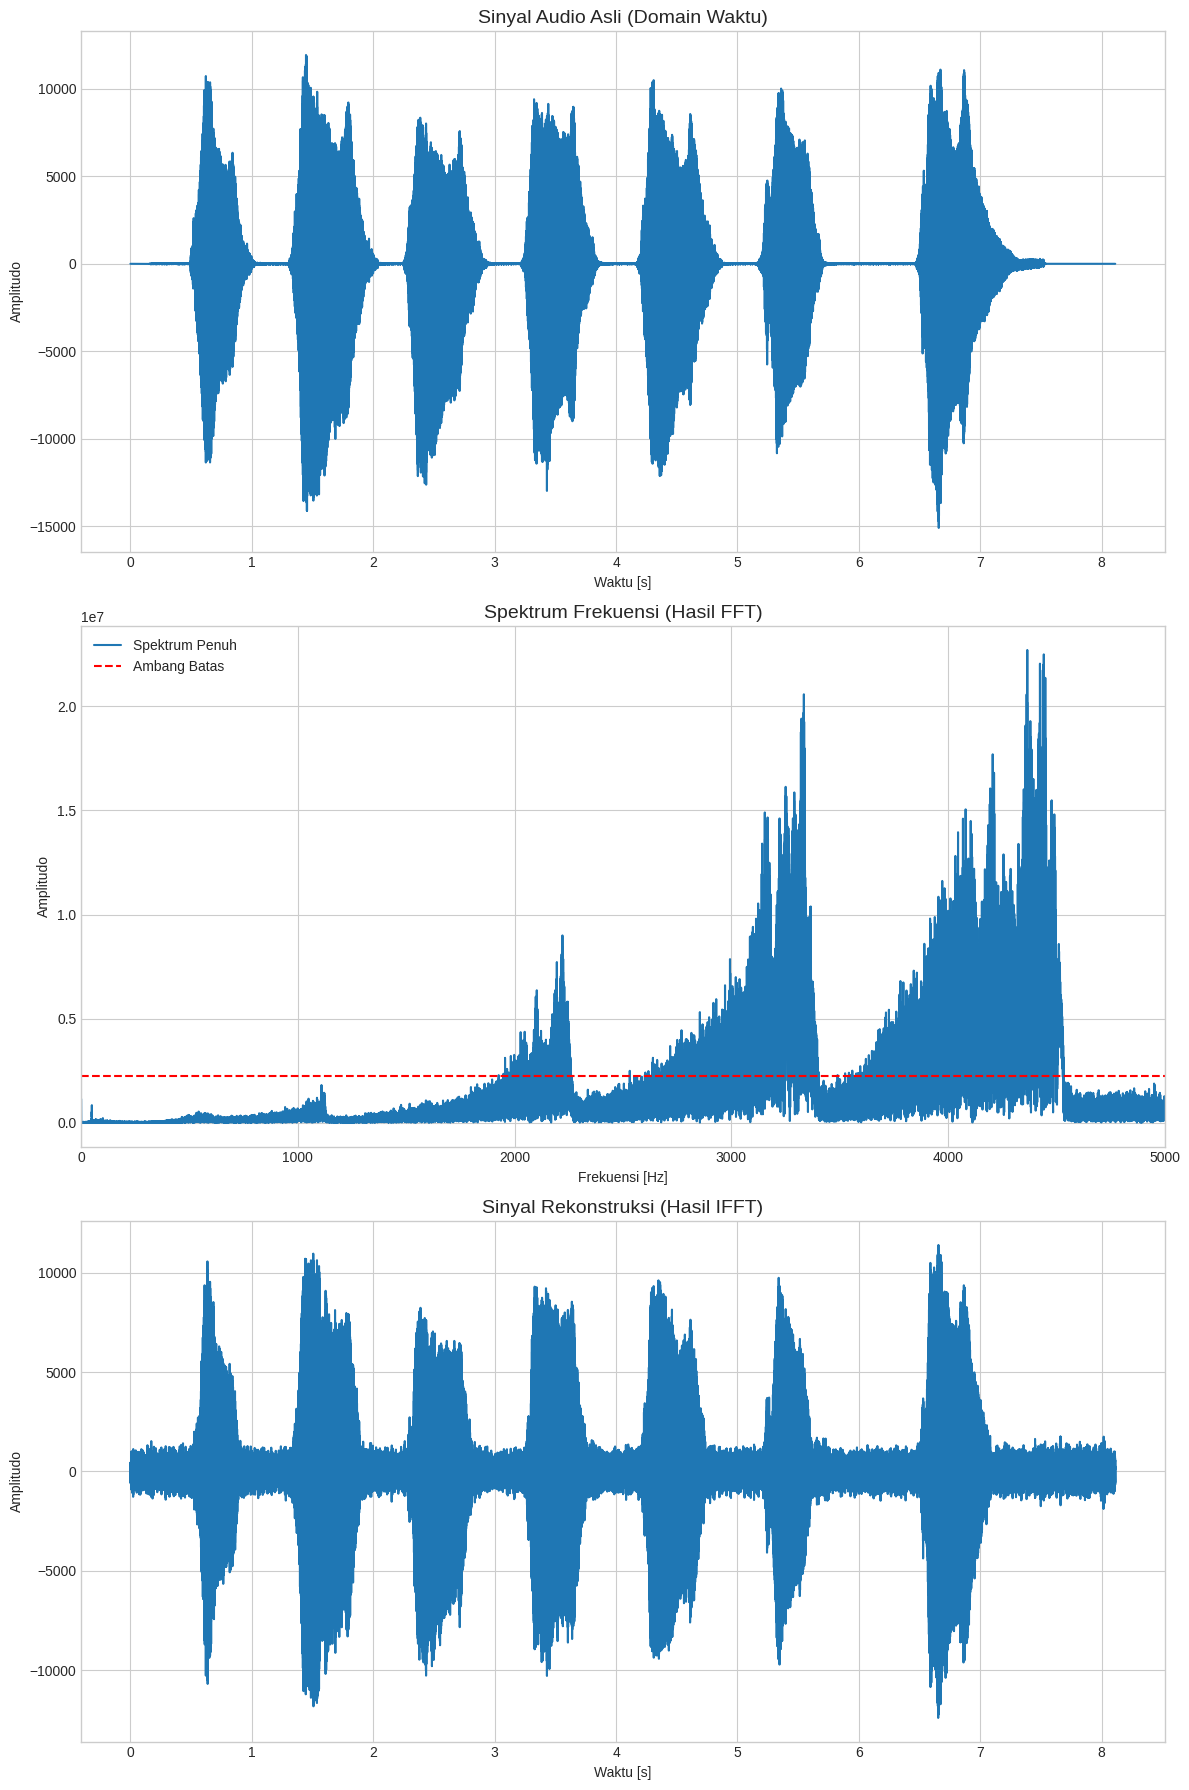


Frekuensi dominan yang teridentifikasi (Hz):
[1926.9  1949.09 1956.36 ... 7760.48 7864.03 7865.14]

Audio Asli:



Audio Hasil Rekonstruksi :


In [13]:
# Visualisasi Hasil
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Sinyal Asli
axs[0].plot(t, audio_data)
axs[0].set_title("Sinyal Audio Asli (Domain Waktu)", fontsize=14)
axs[0].set_xlabel("Waktu [s]")
axs[0].set_ylabel("Amplitudo")
axs[0].grid(True)

# Spektrum Frekuensi
axs[1].plot(xf_positive, yf_abs, label='Spektrum Penuh')
axs[1].axhline(y=threshold, color='r', linestyle='--', label=f'Ambang Batas')
axs[1].set_title("Spektrum Frekuensi (Hasil FFT)", fontsize=14)
axs[1].set_xlabel("Frekuensi [Hz]")
axs[1].set_ylabel("Amplitudo")
axs[1].set_xlim(0, 5000)
axs[1].legend()
axs[1].grid(True)

# Sinyal Rekonstruksi
axs[2].plot(t, reconstructed_signal)
axs[2].set_title("Sinyal Rekonstruksi (Hasil IFFT)", fontsize=14)
axs[2].set_xlabel("Waktu [s]")
axs[2].set_ylabel("Amplitudo")
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Verifikasi frekuensi yang teridentifikasi
dominant_freqs = xf_positive[yf_abs > threshold]
print("\nFrekuensi dominan yang teridentifikasi (Hz):")
print(np.round(dominant_freqs, 2))

# Menampilkan Audio asli dan Hasil Rekontruksi
print("\nAudio Asli:")
display(Audio(data=audio_data, rate=rate))

print("\nAudio Hasil Rekonstruksi :")
display(Audio(data=reconstructed_signal, rate=rate))

# ANALISIS

Dari Hasil visualisasi, kita dapat melihat pada grafik pertama (audio asli) dimana ditampilkan naik turunnya amplitudo selama 8 detik. Kemudian pada pemrosesan FFT audio dibedah dan menampilkan paduan dari banyaknya frekuensi yang berbeda, dan garis merah (ambang batas) pada grafik merupakan filter antara essensial (Di atas garis) dan derau (Di bawah garis) atau sebuah detail yang dapat dihiraukan tanpa merusak karakter utama suara. Kemudian pada pemrosesan rekontruksi dengan frekuensi yang telah disaring audio dikembalikan ke domain waktu dan menciptakan audio yang hampir sama dengan audio aslinya, 8 dentuman nada utama hadir kembali, dan perbedaan tersebut dapat kita dengarkan setelah tampilan visualisasi.


# Refleksi

Fast Fourier Transform adalah suatu algoritma yang digunakan untuk merepresentasikan sinyal  dalam domain  waktu  diskrit  dan domain  frekuensi. Sementara  itu,  IFFT  adalah  singkatan  dari Inverse Fast  Fourier  Transform yaitu rekontruksi dari hasil penyaringan audio pada FFT.

Untuk pembuatan tugas kali ini saya mengambil referensi dari https://www.neliti.com/id/publications/296791/mendisain-gui-untuk-menampilkan-nilai-fft-dan-ifft-menggunakan-labview untuk memahami teori FFT dan IFFT.

Dan untuk codingnya sendiri dari bantuan Gemini AI dan dari visualisasi sampai output hasil audio yang telah difilter coding sendiri dengan melihat tugas-tugas sebelumnya.